# Reinforcement Learning algorithms
## Q Learning
![](http://www.ahuskylife.ca/wp-content/uploads/2012/08/intermittent-rewards.png)

##### Summary
1. Theory behind Q-Learning
2. Environment
3. Implementation

###### RL references

- [Udemy course on RL](https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python/)  
- [Deep Reinforcement Learning: Pong from Pixels](http://karpathy.github.io/2016/05/31/rl/) Andrej Karpathy's blog article on RL (always a reference)
- [David Silver course on RL at UCL](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html)
- [Berkeley course on AI](http://ai.berkeley.edu/lecture_slides.html)

##### Q Learning references
- [Q Learning tutorial by Arthur Juliani](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)
- [Q Learning tutorial on Keon.io](https://keon.io/deep-q-learning/)

##### Deep Q Learning
- [David Silver's Deep Q Learning course](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Resources_files/deep_rl.pdf)
- [Demystyfing Deep Reinforcement Learning](http://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/)
- [Siraj Raval's notebook on Deep Q Learning](https://github.com/llSourcell/deep_q_learning/blob/master/03_PlayingAgent.ipynb)

##### Libraries

In [2]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
sys.path.append("C:/git/machine-learning/")

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
% matplotlib inline

# Seaborn config
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# Deep Learning (Keras, Tensorflow)
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D,ZeroPadding2D,Conv2D
from keras.utils.np_utils import to_categorical

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
# Theory behind Q Learning
## Introduction

## Markov Decision Processes (MDP)
##### Description
// TBD
##### Q, the action-value function
// TBD

## Bellmann equation
// Refaire l'équation pour Q

## Q-Learning
https://en.wikipedia.org/wiki/Q-learning

##### What is Q-Learning ? 
The Q-Learning algorithm is : 
- **Model Free**, that means that we have no prior knowledge of the MDP transitions and rewards, we just execute the policy and learn from experience
- A **control** problem : taking actions in the environment
- **Online planning** : we actually take actions in the world without planning beforehand


##### Equation
Q-Learning is the process of solving the Bellmann Optimality Equation for $q_*(s,a)$ (the optimal action-value function)
$$Q(s,a) = r + \gamma(max(Q(s',a'))$$

Otherwise said, the Q-action-value for a given state (s) and action (a) is the current reward (r) plus the discounted expectation of future rewards if we choose the best action (a') at the next state (s') 


##### Q-Learning Control Algorihtm

$$Q(s,a) \leftarrow Q(s,a) + \alpha (r + \gamma maxQ(s',a') - Q(s,a))$$

Or as a running average, 
$$Q(s,a) \leftarrow (1-\alpha)Q(s,a) + \alpha (r + \gamma maxQ(s',a'))$$


##### Properties
The above equation converges to optimal policy ! <br>
However : 
 - You have to explore enough
 - The learning rate must be slow enough (it is then very slow)

***
# Environment

In [3]:
from ai.rl.cooling_center import CoolingCenter

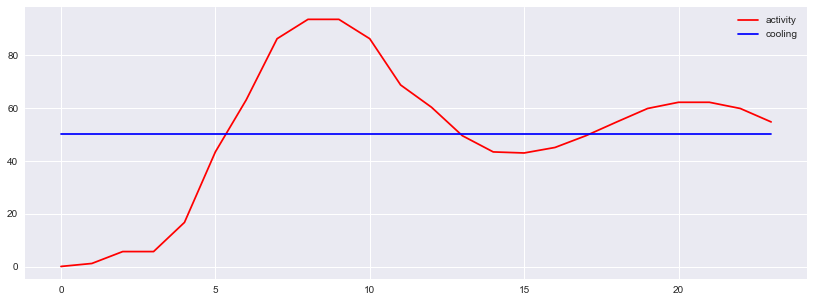

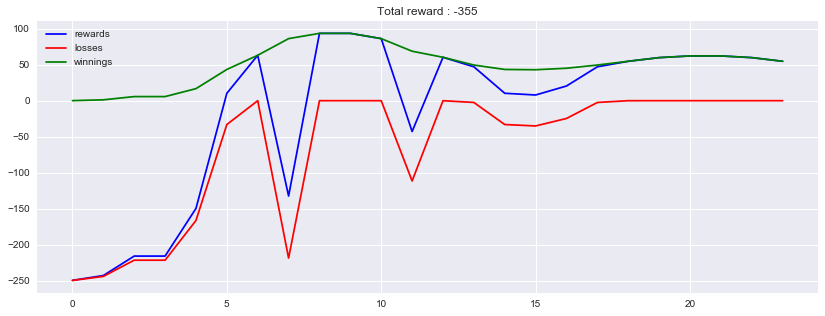

In [4]:
env = CoolingCenter(levels_cooling=10)
env.render()

***
# Implementation

##### Define a Q-Table
// Expliquer l'association Q(s,a) -> matrice

In [5]:
def initialize_Q_table(states,actions):
    return np.zeros([states,actions])

Q = initialize_Q_table(len(env.observation_space),len(env.action_space))
Q

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [6]:
def run_episode(env,Q,max_step = 100,episode_number = 0,lr = 0.8,gamma = 0.95,verbose = 1):
    s = env.reset()
    
    episode_reward = 0
    
    i = 0
    while i < max_step:
        
        # Choose an action
        q = Q[s,:]+ np.random.randn(1,len(env.action_space)) * 0.01* (1./(episode_number + 1))
        a = np.argmax(q)
        
        # Take the action, and get the reward from environment
        s_new,r,done = env.step(a)
        
        
        if verbose: print(s_new,r,done)
        
        # Update our knowledge in the Q-table
        Q[s,a] = (1-lr)*Q[s,a] + lr*(r+gamma*np.max(Q[s_new,:]))
        
        # Update the caches
        episode_reward += r
        s = s_new
        
        # If the episode is terminated
        i += 1
        if done:
            break
            
    return Q,episode_reward,env

In [7]:
def run_n_episodes(env,n_episodes = 2000,lr = 0.8,gamma = 0.95):
    
    # Initialize the Q-table
    Q = initialize_Q_table(len(env.observation_space),len(env.action_space))
    
    # Store the rewards
    rewards = []
    
    # Experience replay
    for i in tqdm(range(n_episodes)):
        
        # Run the episode
        Q,episode_reward,env_temp = run_episode(env,Q,episode_number=i,lr = lr,gamma = gamma,verbose = 0)
        rewards.append(episode_reward)
        
    
    # Plot rewards
    average_running_rewards = np.cumsum(rewards)/np.array(range(1,len(rewards)+1))
    plt.figure(figsize = (15,4))
    plt.plot(average_running_rewards)
    plt.show()
        
    return Q,rewards
        

100%|█████████████████████████████████████| 2000/2000 [00:03<00:00, 623.44it/s]


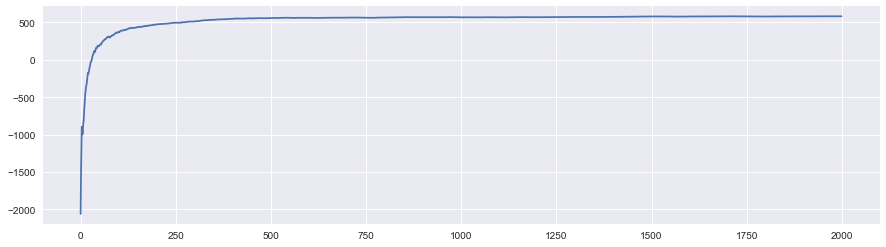

In [8]:
Q,rewards = run_n_episodes(env,n_episodes=2000,lr = 0.1)

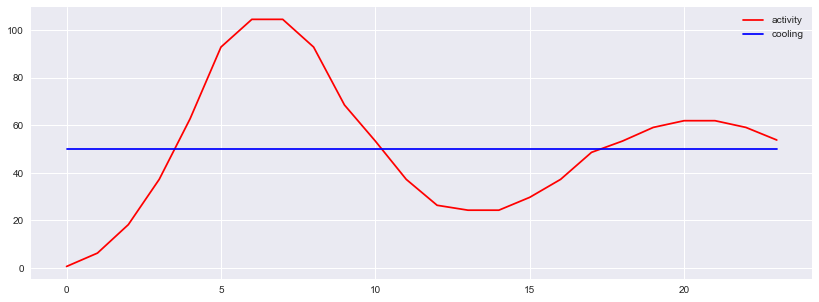

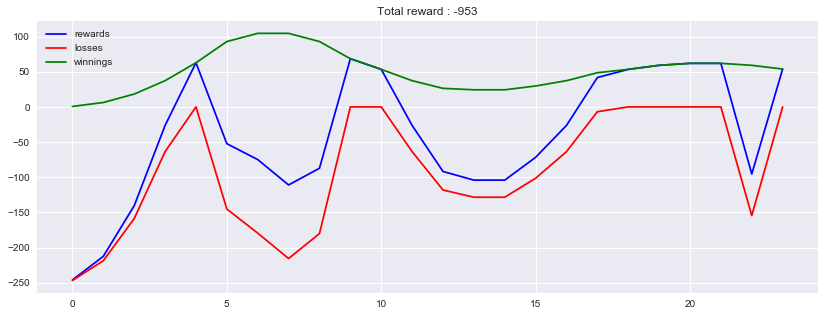

In [9]:
env.reset()
env.render()

In [10]:
env.cooling

array([[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50]])

In [11]:
Q_temp,r,env = run_episode(env,Q,episode_number=200,verbose = True)

1 -49.4710355683 False
2 -42.7382742788 False
2 -15.7008995145 False
4 -15.7008995145 False
6 20.6862741151 False
9 -129.655398254 False
17 64.7574669025 False
19 85.9874584016 False
19 96.8323154628 False
19 96.8323154628 False
17 96.8323154628 False
16 85.9874584016 False
14 80.9389552572 False
12 -40.1427936406 False
12 69.9841161401 False
13 -66.3019956306 False
13 -98.4693696066 False
11 70.9008315438 False
9 69.5595007993 False
8 -67.8252987584 False
7 52.906721759 False
5 46.8088655247 False
4 27.213464564 False
0 20.6862741151 True


In [12]:
env.cooling

array([[10, 10, 10, 10, 30, 40, 60, 80, 80, 80, 80, 80, 70, 60, 60, 60, 50,
        50, 60, 60, 60, 50, 40, 30]])

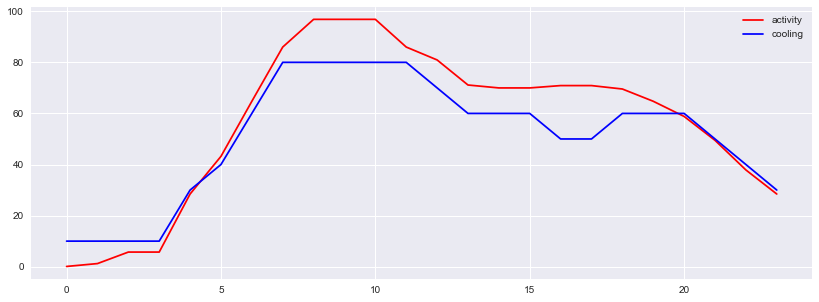

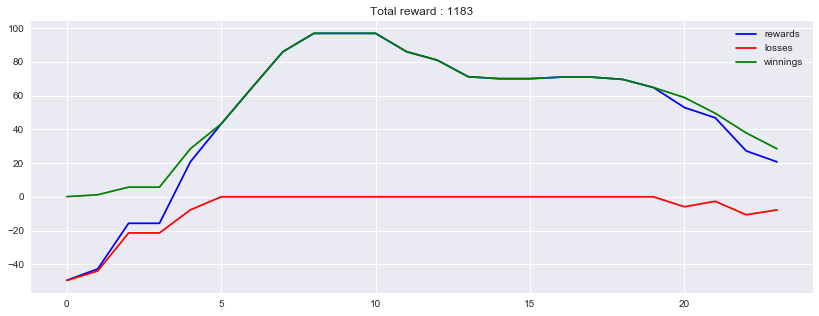

In [13]:
env.render()

# Deep-Q-Learning
- Do a feedforward pass for the current state s to get predicted Q-values for all actions.
- Do a feedforward pass for the next state s’ and calculate maximum overall network outputs max a’ Q(s’, a’).
- Set Q-value target for action to r + γmax a’ Q(s’, a’) (use the max calculated in step 2). For all other actions, set the Q-value target to the same as originally returned from step 1, making the error 0 for those outputs.
- Update the weights using backpropagation.

##### Initialize model

In [106]:
def initialize_Q_model(states,actions):
    model = Sequential()
    model.add(Dense(32,input_dim = states))
    model.add(Activation("relu"))
    model.add(Dense(actions))
    model.add(Activation("linear"))

    model.compile(loss='mse',
                  optimizer="adam",
                  metrics=['accuracy'])
    return model

In [107]:
model = initialize_Q_model(len(env.observation_space),len(env.action_space))

In [77]:
class Memory(object):
    def __init__(self):
        self.inputs = None
        self.targets = None
        self.length = 0
    
    def cache(self,X,y):
        self.inputs = np.vstack([self.inputs,X]) if self.inputs is not None else X
        self.targets = np.vstack([self.targets,y]) if self.targets is not None else y
        self.length = len(self.inputs)
        
        
    def sample(self,batch_size = 32):
        if self.length > batch_size:
            selection = np.random.choice(range(self.length),batch_size,replace = False)
            inputs = self.inputs[selection,:]
            targets = self.targets[selection,:]
            return inputs,targets
        else:
            return self.inputs,self.targets
        
        
    def empty_cache(self):
        self.__init__()
        
        

In [124]:
def run_episode_deep(env,model,memory = None,max_step = 100,episode_number = 0,lr = 0.8,gamma = 0.95,verbose = 1,epsilon = 0.5):
    s = env.reset()
    
    episode_reward = 0
    
    i = 0
    while i < max_step:
        
        # Convert the state to a state vector
        s_vector = to_categorical(s,len(env.observation_space))
        
        # Choose an action with a decayed epsilon greedy exploration
        epsilon_decayed = epsilon/(episode_number/10 + 1)
        q = model.predict(s_vector)
        if np.random.rand() > epsilon:
            a = np.argmax(q)
        else:
            a = np.random.randint(len(env.action_space))
            
        
        # Take the action, and get the reward from environment
        s_new,r,done = env.step(a)
        
        # Convert the new state to a state vector
        s_new_vector = to_categorical(s_new,len(env.observation_space))
        q_new = model.predict(s_new_vector)
        
        
        if verbose: print("{} -> {} : ".format(s,s_new),"reward ",r," action ",a,"!!!" if done else "")
        
        # Update our knowledge in the Q-table
        X = s_vector
        y = q
        
        if not done:
            y[0][a] = r + gamma * np.max(q_new)
        else:
            y[0][a] = r
            
        
        
        # Caching to train later
        if memory is not None:
            memory.cache(X,y)
            
            
        
        
        
        # Update the caches
        episode_reward += r
        s = s_new
        
        # If the episode is terminated
        i += 1
        if done:
            break
            
    return model,episode_reward,env

In [125]:
memory = Memory()

In [126]:
run_episode_deep(env,m,memory = memory)

0 -> 1 :  reward  -46.0919104214  action  1 
1 -> 2 :  reward  -12.3838310028  action  1 
2 -> 3 :  reward  -151.244226512  action  1 
3 -> 15 :  reward  -76.8204527323  action  6 
15 -> 18 :  reward  41.2052612692  action  7 
18 -> 19 :  reward  93.7613500103  action  9 
19 -> 19 :  reward  104.91011381  action  6 
19 -> 18 :  reward  -7.43695110166  action  6 
18 -> 16 :  reward  -71.1554964869  action  0 
16 -> 11 :  reward  -71.7090711741  action  3 
11 -> 7 :  reward  57.0236867028  action  4 
7 -> 4 :  reward  -35.0223026181  action  6 
4 -> 3 :  reward  -126.296758169  action  7 
3 -> 6 :  reward  -119.50378597  action  1 
6 -> 8 :  reward  -120.401854535  action  2 
8 -> 10 :  reward  40.5167887619  action  5 
10 -> 13 :  reward  36.4735177168  action  6 
13 -> 15 :  reward  62.076601622  action  6 
15 -> 14 :  reward  -50.1952396627  action  2 
14 -> 13 :  reward  -59.0854937642  action  9 
13 -> 10 :  reward  62.076601622  action  6 
10 -> 8 :  reward  -13.5264822832  action 

(<keras.models.Sequential at 0x13c091d0>,
 -383.0495003298513,
 <ai.rl.cooling_center.CoolingCenter at 0xde9fb00>)

In [127]:
def run_n_episodes_deep(env,n_episodes = 2000,lr = 0.8,gamma = 0.95,epsilon = 0.8,batch_size = 32):
    
    # Initialize the Q-table
    model = initialize_Q_model(len(env.observation_space),len(env.action_space))
    memory = Memory()
    
    # Store the rewards
    rewards = []
    
    # Experience replay
    for i in tqdm(range(n_episodes)):
        
        # Run the episode
        model,episode_reward,env_temp = run_episode_deep(env,model,memory = memory,episode_number=i,lr = lr,gamma = gamma,verbose = 0,epsilon = epsilon)
        rewards.append(episode_reward)
        
        # Training
        inputs,targets = memory.sample(batch_size)
        model.train_on_batch(inputs,targets)
        
    
    # Plot rewards
    average_running_rewards = np.cumsum(rewards)/np.array(range(1,len(rewards)+1))
    plt.figure(figsize = (15,4))
    plt.plot(average_running_rewards)
    plt.show()
        
    return model,rewards
        

In [ ]:
m,r = run_n_episodes_deep(env,1000)


 22%|████████▌                              | 221/1000 [00:06<00:23, 32.59it/s]

https://www.quora.com/What-is-difference-between-DQN-and-Policy-Gradient-methods

Policy gradient methods, and more generally policy-based methods find the optimal policy by directly optimizing for the long term reward.
By contrast, policy networks take a simpler approach. Simply input the state and out comes an action! Then you simply find out which actions worked well and increase their probability. This may sound exceedingly stupid, and it is, but this approach cracked AlphaGo! ;)

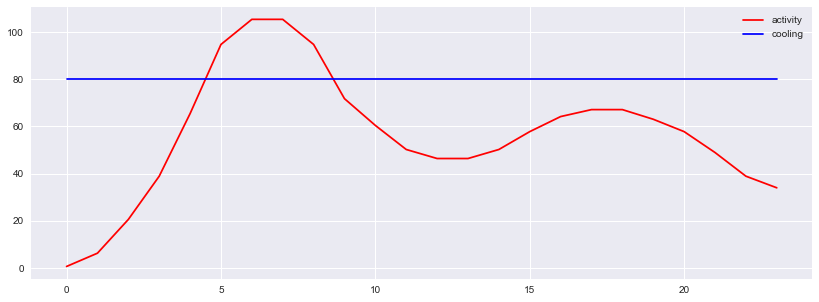

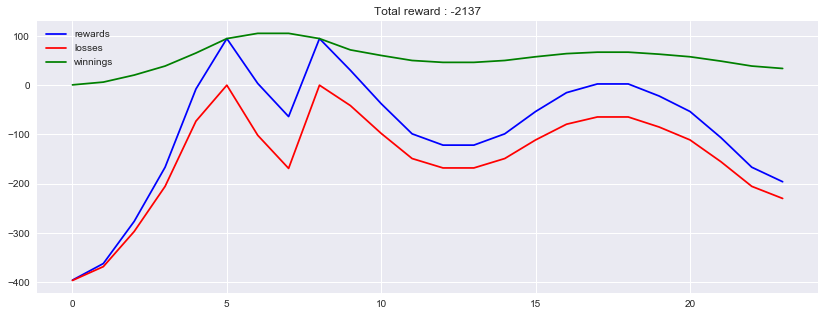

In [116]:
env.reset()
env.render()

In [118]:
model_temp,r,env = run_episode_deep(env,model,episode_number=200,verbose = True)

0 -> 1 :  reward  -198.562125597  action  4 
1 -> 2 :  reward  -133.316305559  action  3 
2 -> 3 :  reward  -80.9290138143  action  3 
3 -> 6 :  reward  -120.761348927  action  5 
6 -> 9 :  reward  -96.0355171405  action  1 
9 -> 17 :  reward  -104.073512552  action  3 
17 -> 19 :  reward  -97.5333278715  action  3 
19 -> 19 :  reward  14.5203080033  action  3 
19 -> 18 :  reward  1.24035480844  action  3 
18 -> 17 :  reward  -155.586848215  action  2 
17 -> 15 :  reward  -80.8898449306  action  3 
15 -> 13 :  reward  73.237119857  action  7 
13 -> 11 :  reward  70.3416261592  action  5 
11 -> 11 :  reward  68.8478999227  action  6 
11 -> 14 :  reward  68.8478999227  action  6 
14 -> 14 :  reward  71.2584905481  action  7 
14 -> 13 :  reward  71.2584905481  action  7 
13 -> 9 :  reward  70.3416261592  action  5 
9 -> 8 :  reward  -133.939696024  action  3 
8 -> 7 :  reward  59.8460561977  action  4 
7 -> 6 :  reward  -100.257373173  action  8 
6 -> 4 :  reward  -82.4602859615  action  

In [119]:
env.cooling

array([[40, 30, 30, 50, 10, 30, 30, 30, 30, 20, 30, 70, 50, 60, 60, 70, 70,
        50, 30, 40, 80, 10, 40, 50]])

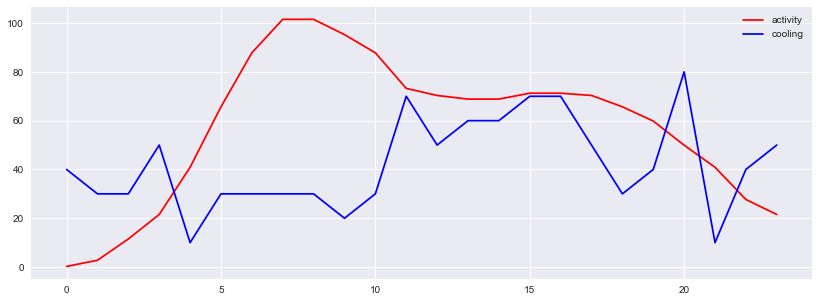

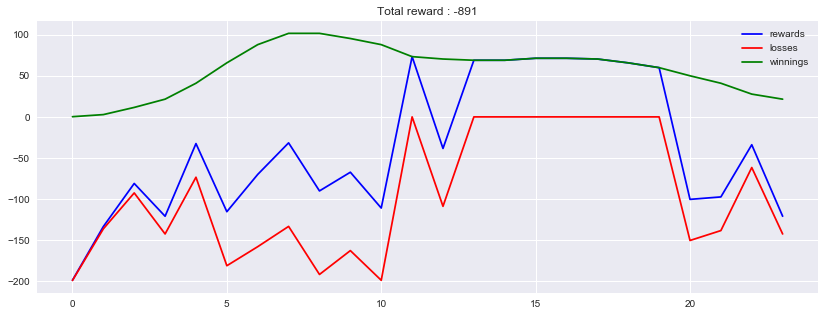

In [123]:
env.render()